<a href="https://colab.research.google.com/github/hslee1539/rc-ai/blob/master/rc_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# rc ai



In [1]:
# 데이터 및 로딩
!git clone https://github.com/hslee1539/rc-ai

Cloning into 'rc-ai'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 139 (delta 21), reused 27 (delta 12), pack-reused 98
Receiving objects: 100% (139/139), 280.61 MiB | 50.30 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Checking out files: 100% (88/88), done.


레파지토리 패스 추가

In [2]:
import sys

sys.path.append("./rc-ai/src")

데이터 로딩 및 전처리

In [ ]:
import data
import numpy as np

data_model = data.DataModel("./rc-ai/data/x", "./rc-ai/data/y", (100, 100, 3), (100, 100, 3), (25, 25, 2))
result = data.load(data_model)

x_train = np.array(result[0], dtype=data_model.dtype) / 255
y_train = (np.array(result[1], dtype=data_model.dtype) / 255)
x_eval = np.array(result[2], dtype=data_model.dtype) / 255
y_eval = (np.array(result[3], dtype=data_model.dtype) / 255)
x_test = np.array(result[4], dtype=data_model.dtype) / 255
y_test = (np.array(result[5], dtype=data_model.dtype) / 255)

네트워크 생성

In [5]:
import network
import matplotlib.pyplot as plt
# 13320 * 256

net = network.load()

net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (1, 98, 98, 5)            140       
_________________________________________________________________
batch_normalization (BatchNo (1, 98, 98, 5)            20        
_________________________________________________________________
conv2d_1 (Conv2D)            (1, 47, 47, 7)            882       
_________________________________________________________________
batch_normalization_1 (Batch (1, 47, 47, 7)            28        
_________________________________________________________________
conv2d_2 (Conv2D)            (1, 41, 41, 13)           4472      
_________________________________________________________________
batch_normalization_2 (Batch (1, 41, 41, 13)           52        
_________________________________________________________________
conv2d_3 (Conv2D)            (1, 29, 29, 17)           3

데이터 학습

gpu가 훠얼씬 더 빠르니 tpu는 버릴

In [44]:
pre_trained_y = net.predict(x_test, 300)

net.fit(x_train, y_train, epochs=15, batch_size=300, validation_data=(x_eval, y_eval))

trained_y = net.predict(x_test, 300)

real_y = y_test

pre_trained_y = np.insert(pre_trained_y, 2, 0, -1)

trained_y = np.insert(trained_y, 2, 0, -1)

real_y = np.insert(real_y, 2, 0, -1)


Epoch 1/15
31/31 [==============================] - 2s 73ms/step - loss: 0.0060 - val_loss: 0.0057
Epoch 2/15
31/31 [==============================] - 2s 72ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 3/15
31/31 [==============================] - 2s 73ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 4/15
31/31 [==============================] - 2s 74ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 5/15
31/31 [==============================] - 2s 74ms/step - loss: 0.0059 - val_loss: 0.0050
Epoch 6/15
31/31 [==============================] - 2s 72ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 7/15
31/31 [==============================] - 2s 73ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 8/15
31/31 [==============================] - 2s 73ms/step - loss: 0.0060 - val_loss: 0.0053
Epoch 9/15
31/31 [==============================] - 2s 74ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 10/15
31/31 [==============================] - 2s 73ms/step - loss: 0.0059 - val_loss: 0.0050
Epoch 11/

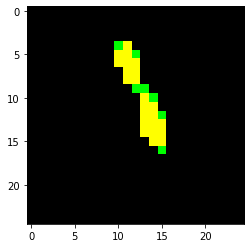

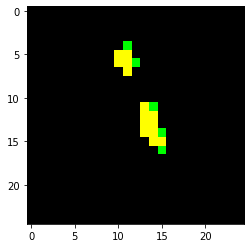

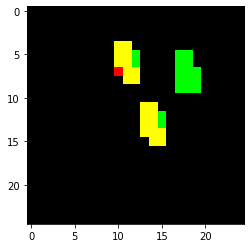

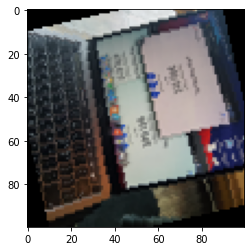

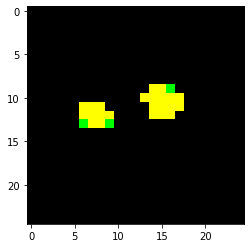

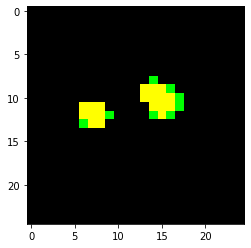

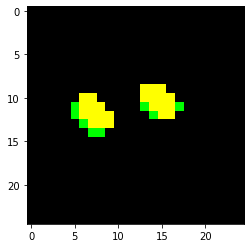

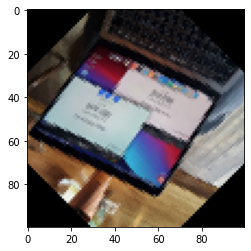

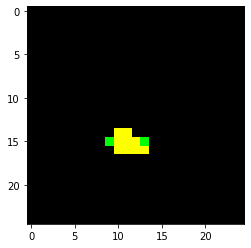

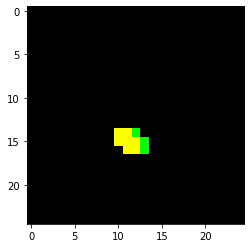

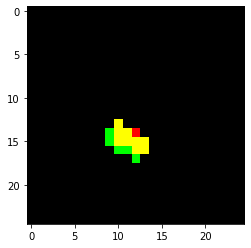

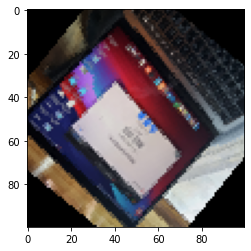

In [47]:

for i in range(3):
    plt.imshow(do_threshold(pre_trained_y[i]), vmin=0., vmax=1.)
    plt.show()
    plt.imshow(do_threshold(trained_y[i]), vmin=0., vmax=1.)
    plt.show()
    plt.imshow(real_y[i], vmin=0., vmax=1.)
    plt.show()
    plt.imshow(x_test[i])
    plt.show()

In [42]:
threshold = 0.35

In [35]:
import numpy as np
def do_threshold(x):
  if x > threshold:
    return 1.0
  else:
    return 0.0

do_threshold = np.vectorize(do_threshold)